In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly
%matplotlib inline
import plotly.plotly as py
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
style.use('fivethirtyeight')

In [3]:
df = pd.read_csv("C:\\Users\\Saikat chowdhury\\OneDrive\\Desktop\\Linear-Regression-master\\housingdata.csv",header = None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
#Column name info:
#CRIM per capita crime rate by town

#ZN proportion of residential land zoned for lots over 25,000 sq.ft.

#INDUS proportion of non-retail business acres per town

#CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

#NOX nitric oxides concentration (parts per 10 million)

#RM average number of rooms per dwelling

#AGE proportion of owner-occupied units built prior to 1940

#DIS weighted distances to five Boston employment centres

#RAD index of accessibility to radial highways

#TAX full-value property-tax rate per $10,000

#PTRATIO pupil-teacher ratio by town

#B [1000*(Bk - 0.63) ^ 2] where Bk is the proportion of blacks by town

#LSTAT percentage lower status of the population

#MEDV Median value of owner-occupied homes in $1000s

In [6]:
housing_columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [7]:
df.columns = housing_columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
df.shape

(506, 14)

In [10]:
def plotFeatures(col_list,title):
    plt.figure(figsize=(10,14))
    i=0
    print(len(col_list))
    for col in col_list:
        i+=1
        plt.subplot(7,2,i)
        plt.plot(df[col],df["MEDV"],marker='.',linestyle='none')
        plt.title(title % (col))
        plt.tight_layout()

13


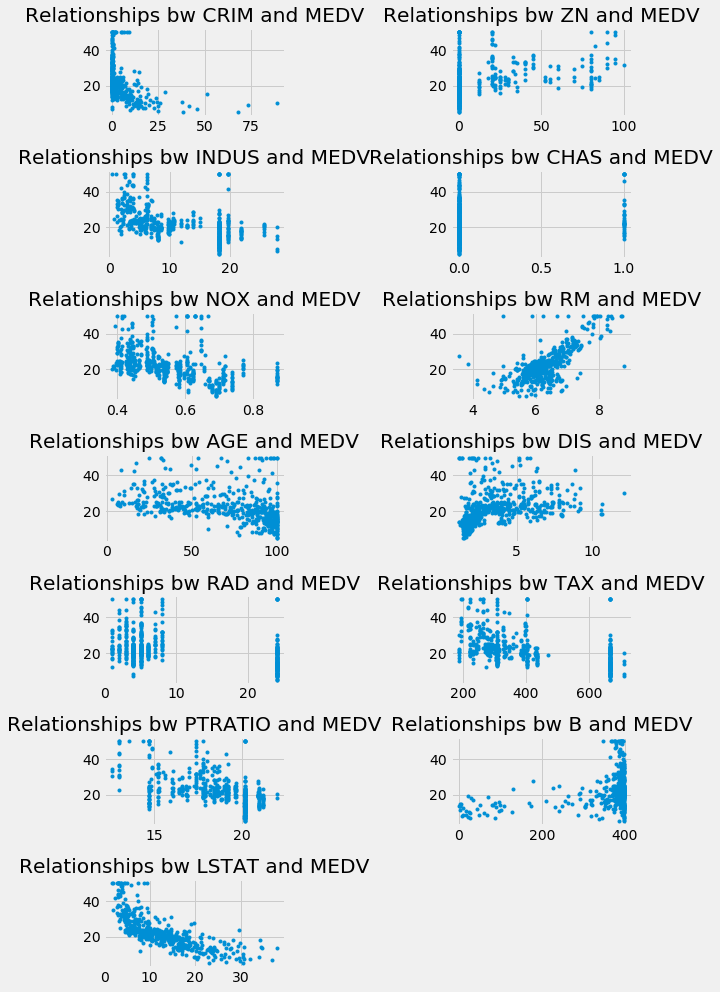

In [11]:
colnames = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
plotFeatures(colnames,"Relationships bw %s and MEDV")

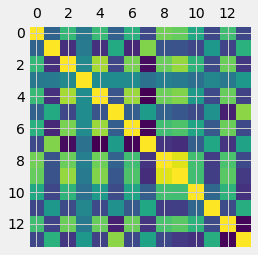

In [12]:
plt.matshow(df.corr())

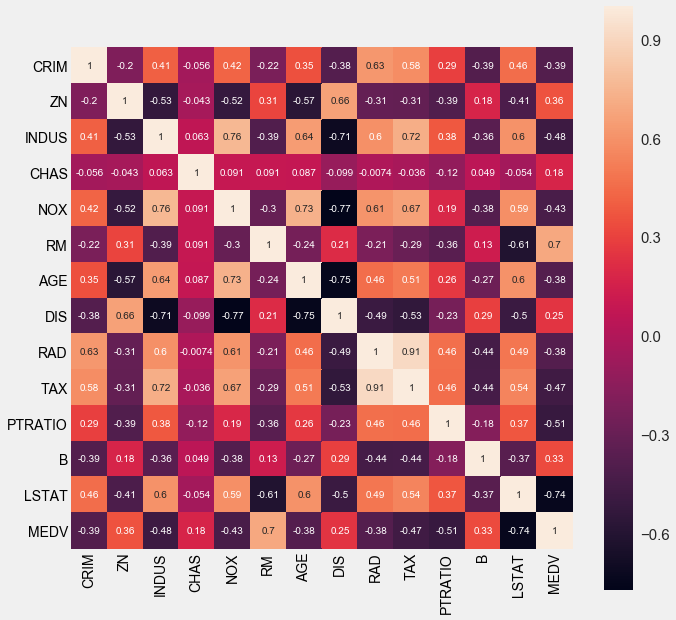

In [13]:
fig = plt.subplots(figsize = (10,10))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(),square= True,cbar=True,annot=True,annot_kws={'size':10})
plt.show()

In [14]:
def predictPrice(x,theta):
    return np.dot(x,theta)

In [15]:
def calculatorCost(x,theta,Y):
    prediction = predictPrice(x,theta)
    return ((prediction - Y)**2).mean()/2
    

In [16]:
def abline(x,theta,Y):
    """ plot a line from slope and interept"""
    
    y_vals = predictPrice(x,theta)
    plt.xlim(0,20)
    plt.ylim(-10,60)
    plt.xlabel('No. of Rooms in the house')
    plt.ylabel('price of house')
    plt.gca().set_aspect(0.1,adjustable='datalim')
    plt.plot(x,Y,'.',x, y_vals,'-')
    plt.show()

In [18]:
def gradientDescentLinearRegression(alpha=0.047,iter=5000):
    theta0 = []
    theta1 = []
    costs = []
    predictor = df["RM"]
    x=np.column_stack((np.ones(len(predictor)),predictor))
    Y = df["MEDV"]
    theta = np.zeros(2)
    for i in range(iter):
        pred = predictPrice(x,theta)
        t0 = theta[0] - alpha *(pred -Y).mean()
        t1 = theta[1] - alpha *((pred - Y)* x[:,1]).mean()
        
        theta = np.array([t0,t1])
        j = calculatorCost(x,theta,Y)
        theta0.append(t0)
        theta1.append(t1)
        costs.append(j)
        if i%1000==0:
            print(f"Iteration: {i+1},Cost = {j},theta ={theta}")
            abline(x,theta,Y)
    print(f'theta0 = {len(theta0)}\ntheta1 = {len(theta1)}\nCosts = {len(costs)}')

Iteration: 1,Cost = 258.0310838585916,theta =[1.0590419  6.86646571]


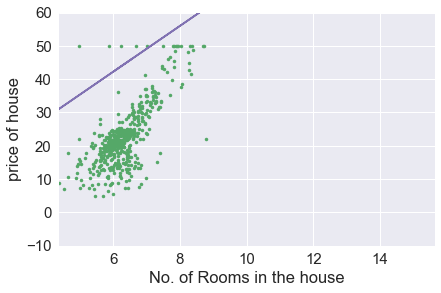

Iteration: 1001,Cost = 24.266176819466,theta =[-14.66352286   5.95689176]


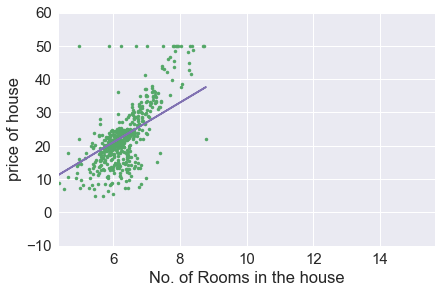

Iteration: 2001,Cost = 22.596414573659313,theta =[-23.30244842   7.31497465]


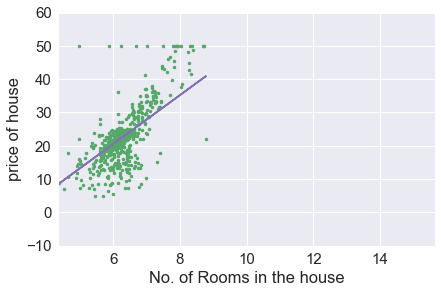

Iteration: 3001,Cost = 22.057316548467956,theta =[-28.21114608   8.08664681]


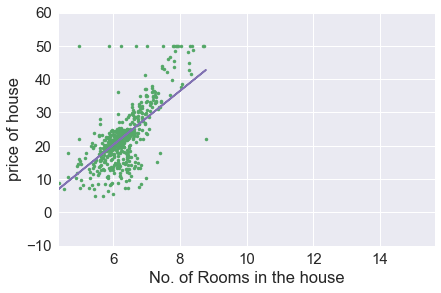

Iteration: 4001,Cost = 21.8832638164128,theta =[-31.00030227   8.52511631]


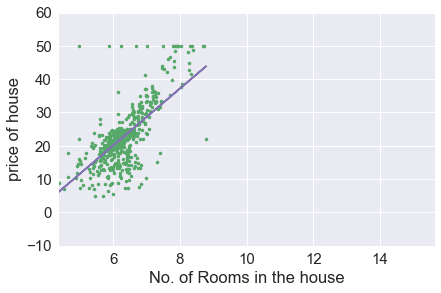

theta0 = 5000
theta1 = 5000
Costs = 5000


In [19]:
gradientDescentLinearRegression()

# created by saikat chowdhury